In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
%run imports_notebook.py

Using device cuda


In [5]:
# game = Game('data/0021500001.json')
# game.read_json()

In [6]:
batch = torch.load('data_processed/0021500001_00000.pth')
mbd = torch.load('data_processed/mbd')

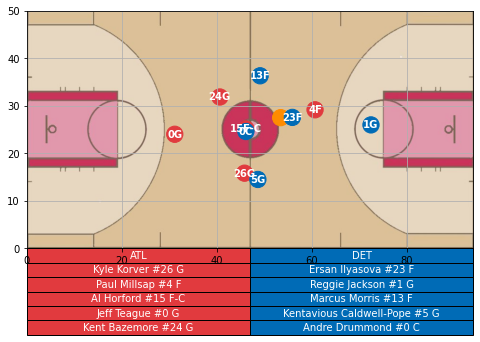

In [9]:
ba = animation.BasketballAnimation(mbd, batch['x'], batch['id_team'], batch['id_player'], None)

In [ ]:
! rm vid.gif

In [91]:
%%time
ba.anim.save('vid.gif', writer='imagemagick')

CPU times: user 26.9 s, sys: 11.4 s, total: 38.3 s
Wall time: 56 s


In [10]:
batch['x'].shape

torch.Size([111, 11, 3])

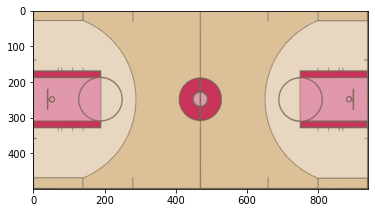

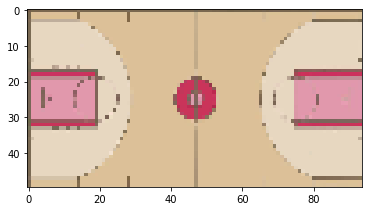

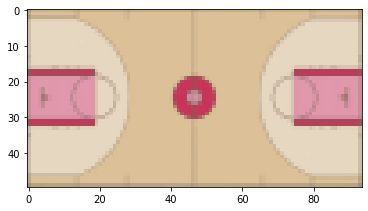

In [11]:
img_court = plt.imread('court.png')
plt.imshow(img_court); plt.show()
a = img_court[::10, ::10]
plt.imshow(a); plt.show()
img_court = cv2.resize(img_court, (94, 50), interpolation=cv2.INTER_AREA)
plt.imshow(img_court); plt.show()

In [12]:
def hex_to_rgb(hexa):
    """
    https://stackoverflow.com/questions/29643352/converting-hex-to-rgb-value-in-python
    """
    return tuple(int(hexa[i:i+2], 16)  for i in (0, 2, 4))

In [20]:
def torch_vid(x, id_team, id_player, flip=False, int_dtype=True, tqdm=None):
    x = x.round().to(int)
    vid = img_court
    # vid = np.zeros((len(x), 94+1, 50+1, 3))
    vid = np.tile(img_court[None], (len(x), 1, 1, 1))/2.
    
    for i_frame in range(len(x)) if tqdm is None else tqdm(range(len(x))):
        for i_player in range(len(x[i_frame])-1, -1, -1):
            xi, yi, zi = x[i_frame, i_player].tolist()
            id_team_i = id_team[i_frame, i_player].item()
            id_player_i = id_team[i_frame, i_player].item()
            color = constants_ui.team_id2color[id_team_i]
            color = np.array(hex_to_rgb(color[1:]))/255.
            cv2.circle(vid[i_frame], (xi, yi), 1, color, -1)
            
            # print(i_player)
        # for id_team, id_player, (x, y, z) in 
        
        # for color, (idx_start, idx_end) in zip([[1., .84, 0], [0, 1., 0.], [1., 0., 0.]],
        #                                        [(0, 1), (1, 6), (6, 11)]):
        #     x0, y0 = xi[idx_start: idx_end, 0], xi[idx_start: idx_end, 1]
        #     # for offset_x, offset_y in [(0, 0), (1,1), (-1, -1)]:
        #         # x, y = x0+offset_x, y0+offset_y
        #         # x, y = x.clip(0, 94), y.clip(0, 50)
        #     for x, y in zip(xi[idx_start: idx_end, 0].tolist(), xi[idx_start: idx_end, 1].tolist()):
        #         # cv2.circle(vid[i], center_coordinates, radius, color, thickness)
        #         # vid[i, :, x, y] = torch.tensor([1.,.84,0])[:, None]
        #         # vid[i, :, xi[1:6, 0], xi[1:6, 1]] = torch.tensor([0.,1.,0])[:, None]
        #         # vid[i, :, xi[6:, 0], xi[6:, 1]] = torch.tensor([1.,0.,0])[:, None]
    
    vid = torch.from_numpy(vid).permute(0, 3, 1, 2)
    if flip:
        vid = vid.flip(-2)
    if int_dtype:
        vid = (vid*255).to(torch.uint8)
    return vid

  0%|          | 0/111 [00:00<?, ?it/s]

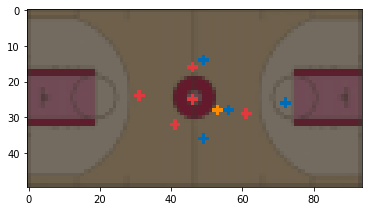

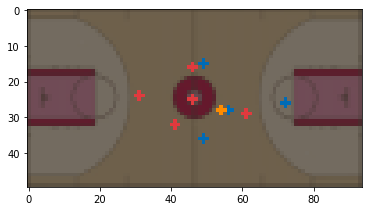

In [21]:
vid = torch_vid(batch['x'], batch['id_team'], batch['id_player'], tqdm=tqdm)
plt.imshow(vid[0].permute(1, 2, 0).numpy()); plt.show()
plt.imshow(vid[1].permute(1, 2, 0).numpy()); plt.show()
# plt.imshow(vid[2].permute(1, 2, 0).numpy()); plt.show()

In [7]:
import wandb
wandb.init()

wandb: Currently logged in as: akarshkumar0101 (use `wandb login --relogin` to force relogin)


In [49]:
for f in tqdm(['data_processed/'+f for f in os.listdir('data_processed/') if f.endswith('.pth')][:100]):
    batch = torch.load(f)
    vid = torch_vid(batch['x'])
    # wandb.log({"vids": wandb.Video(vid.numpy(), fps=25)})

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/111 [00:00<?, ?it/s]

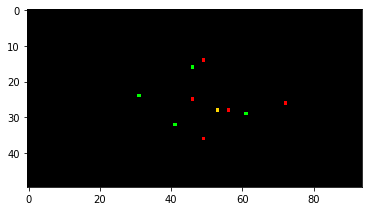

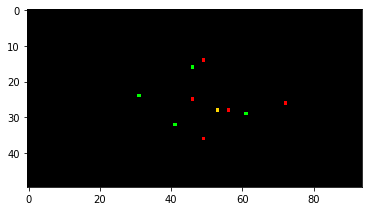

In [ ]:
vid = torch_vid(batch['x'])
plt.imshow(vid[0].permute(1, 2, 0).numpy()); plt.show()
plt.imshow(vid[0].permute(1, 2, 0).numpy()); plt.show()
# plt.imshow(vid[1].permute(1, 2, 0).numpy()); plt.show()
# plt.imshow(vid[2].permute(1, 2, 0).numpy()); plt.show()

In [8]:
import wandb

In [9]:
wandb.init()

wandb: Currently logged in as: akarshkumar0101 (use `wandb login --relogin` to force relogin)


In [13]:
wandb.log({"animation": wandb.Video((vid*255).to(torch.uint8).numpy(), fps=25)})